In [1]:
from matplotlib import pyplot as plt
from bids import BIDSLayout
import pandas as pd
import numpy as np
from itertools import product
import os
import mne

from util.viz import plot_fsaverage
from nilearn import datasets, surface, plotting
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

In [2]:
layout = BIDSLayout('bids_temp', derivatives = True)

In [3]:
f = layout.get(subject = '01', desc = 'model', suffix = 'r2')[0]
acc = np.load(f)[0,:]
f = layout.get(subject = '01', desc = 'control', suffix = 'r2')[0]
ctrl = np.load(f)[0,:]
f = layout.get(subject = '01', desc = 'difference', suffix = 'r2')[0]
diff = np.load(f)[0,:]
f = layout.get(subject = '01', desc = 'model', suffix = 'mask')[0]
mask = np.load(f)

Gtk-Message: 17:15:42.061: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:15:46.322: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:15:50.611: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:15:54.491: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:16:00.018: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:16:03.247: Failed to load module "canberra-gtk-module"


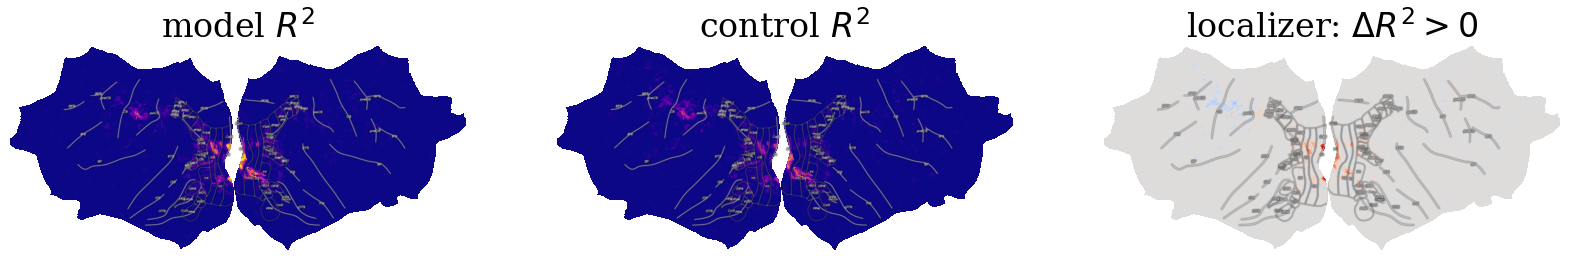

In [4]:
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(1, 3, figsize = (20, 6))
plot_fsaverage(acc, ax = axs[0], vlim = acc.max(), positive = True, colorbar = False)
axs[0].set_title(r'model $R^2$')
plot_fsaverage(ctrl, ax = axs[1], vlim = acc.max(), positive = True, colorbar = False)
axs[1].set_title(r'control $R^2$')
plot_fsaverage(diff, ax = axs[2], positive = False, colorbar = False)
axs[2].set_title(r'localizer: $\Delta R^2 > 0$')
plt.savefig('figures/localizer-flat.jpeg', dpi = 500, bbox_inches = 'tight')
plt.show()

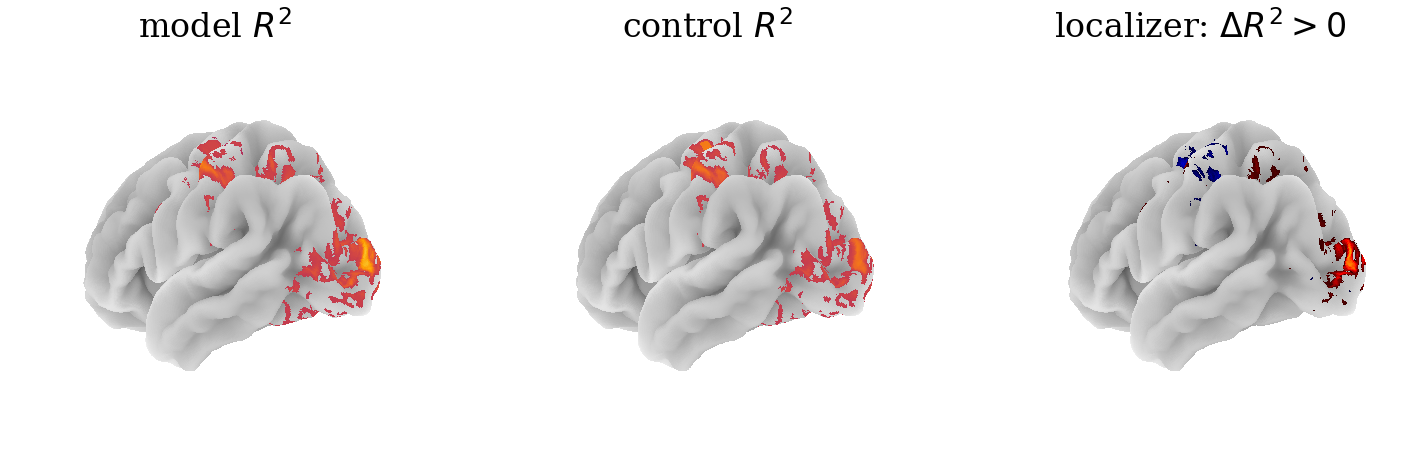

In [5]:
fig, axs = plt.subplots(
    1, 3, 
    figsize = (18, 6), 
    subplot_kw = {'projection': '3d'}
)

kwargs = dict(
    bg_map = fsaverage['sulc_left'], 
    hemi = 'left',
    colorbar = False,
    threshold = .01,
    view = (0, 200),
)

_acc = acc.copy()
_acc[~mask] = 0.
fig = plotting.plot_surf_stat_map(
    fsaverage.pial_left, _acc[:acc.size//2],
    cmap = 'inferno',
    axes = axs[0],
    **kwargs
)

_acc = ctrl.copy()
_acc[~mask] = 0.
_acc[0] = acc.max() # so colorbar is constant
fig = plotting.plot_surf_stat_map(
    fsaverage.pial_left, _acc[:acc.size//2],
    cmap = 'inferno',
    axes = axs[1],
    **kwargs
)

_acc = diff.copy()
_acc[~mask] = 0.
fig = plotting.plot_surf_stat_map(
    fsaverage.pial_left, _acc[:acc.size//2],
    axes = axs[2],
    **kwargs
)

axs[0].set_title(r'model $R^2$')
axs[1].set_title(r'control $R^2$')
axs[2].set_title(r'localizer: $\Delta R^2 > 0$')

plt.savefig('figures/localizer-pial.jpeg', dpi = 500, bbox_inches = 'tight')
plt.show()

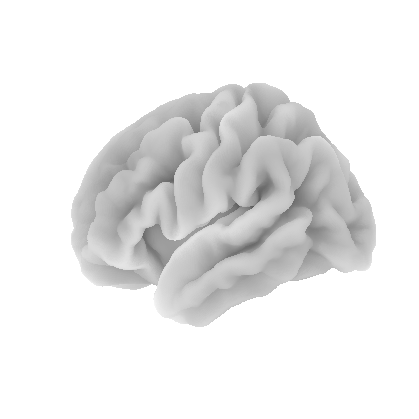

In [6]:
# plot one brain without any data
kwargs['threshold'] = np.inf
kwargs['view'] = 'lateral'
fig = plotting.plot_surf_stat_map(
    fsaverage.pial_left, _acc[:acc.size//2],
    **kwargs
)
plt.savefig('figures/empty-pial.jpeg', dpi = 500, bbox_inches = 'tight')
plt.show()

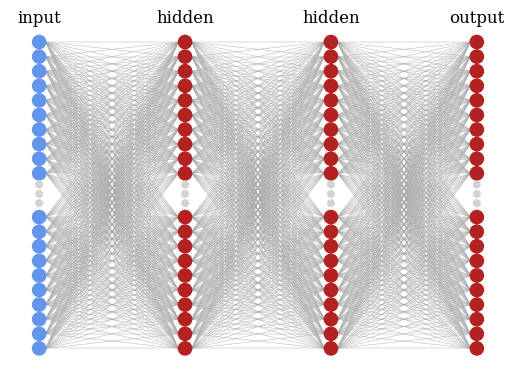

In [7]:
plt.rcParams.update({'font.size': 12})
from nnv import NNV

red = 'firebrick'
blue = 'cornflowerblue'
grey = 'darkgrey'

edge_width = .3
layersList = [
    {"title":"input", "units": 60, "edges_width":edge_width, "color": blue, "edges_color":grey},
    {"title":"hidden", "units": 30, "edges_width":edge_width, "color": red, "edges_color":grey},
    {"title":"hidden", "units": 30, "edges_width":edge_width, "color": red, "edges_color":grey},
    {"title":"output", "units": 38, "edges_width":edge_width, "color": red, "edges_color":grey},
]
style = dict(
    max_num_nodes_visible = 20, 
    node_radius = 5,
    font_size = 12
)
nnv = NNV(layersList, spacing_layer = 100, **style)
fig, ax = nnv.render(save_to_file = None)
fig.savefig('figures/ann.jpeg', dpi = 500, bbox_inches = 'tight')
plt.show()

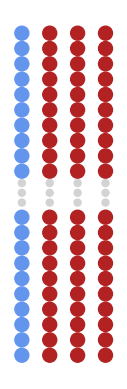

In [8]:
for layer in layersList:
    layer["edges_width"] = 0.
    layer["title"] = ''
nnv = NNV(layersList, spacing_layer = 10, **style)
fig, ax = nnv.render(save_to_file = None)
fig.savefig('figures/nodes-all.jpeg', dpi = 500, bbox_inches = 'tight')
plt.show()

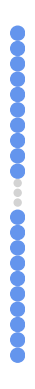

In [9]:
layersList = [layer for layer in layersList if layer['color'] == blue]
nnv = NNV(layersList, **style)
fig, ax = nnv.render(save_to_file = None)
fig.savefig('figures/nodes-input.jpeg', dpi = 500, bbox_inches = 'tight')
plt.show()

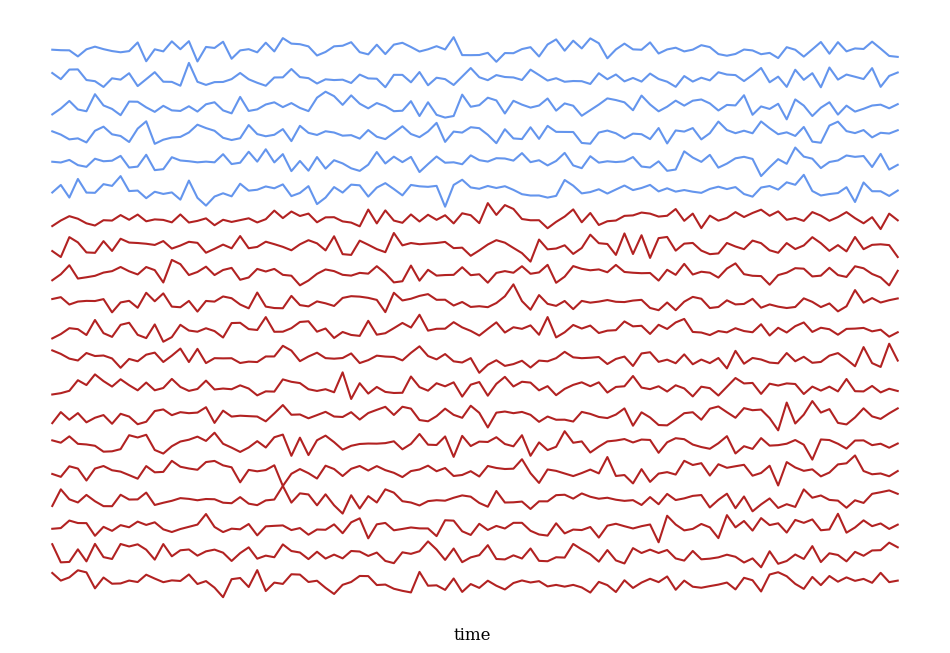

In [10]:
np.random.seed(0)
x = np.random.normal(0, 1, size = (20, 100))
x += 5*np.arange(x.shape[0])[:, np.newaxis]
plt.figure(figsize = (12, 8))
for i in range(x.shape[0]):
    if i < 14:
        c = red
    else:
        c = blue
    plt.plot(x[i], color = c)
plt.axis('off')
plt.text(x.shape[1]/2 - 3, -10, 'time')
plt.savefig('figures/ts-illustration-all.jpeg', dpi = 500, bbox_inches = 'tight')
plt.show()

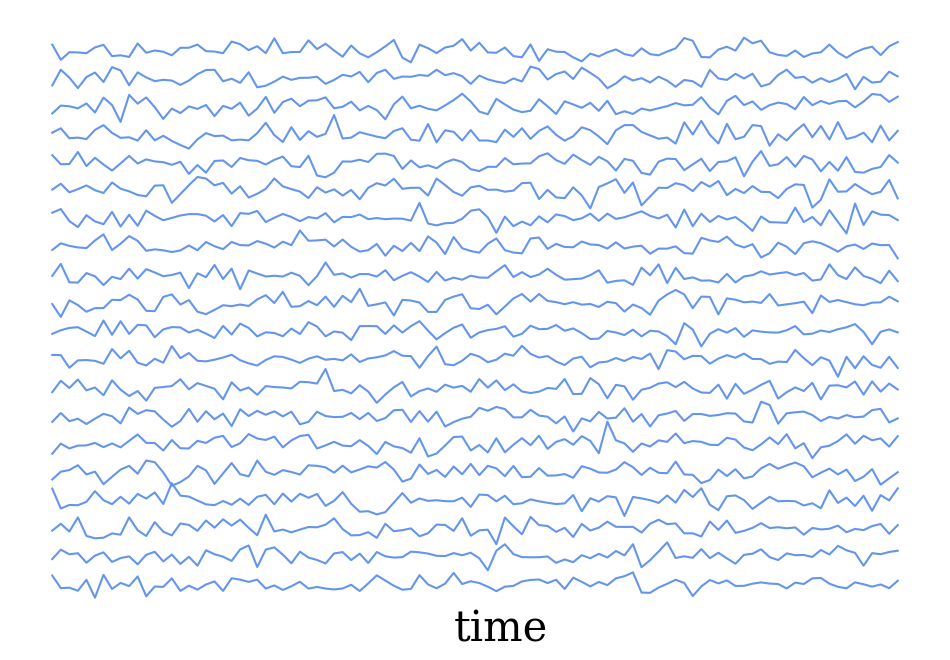

In [11]:
np.random.seed(1)
x = np.random.normal(0, 1, size = (20, 100))
x += 5*np.arange(x.shape[0])[:, np.newaxis]
plt.figure(figsize = (12, 8))
for i in range(x.shape[0]):
    plt.plot(x[i], color = blue)
plt.axis('off')
plt.text(x.shape[1]/2 - 3, -10, 'time', size = 30)
plt.savefig('figures/ts-illustration-input.jpeg', dpi = 500, bbox_inches = 'tight')
plt.show()

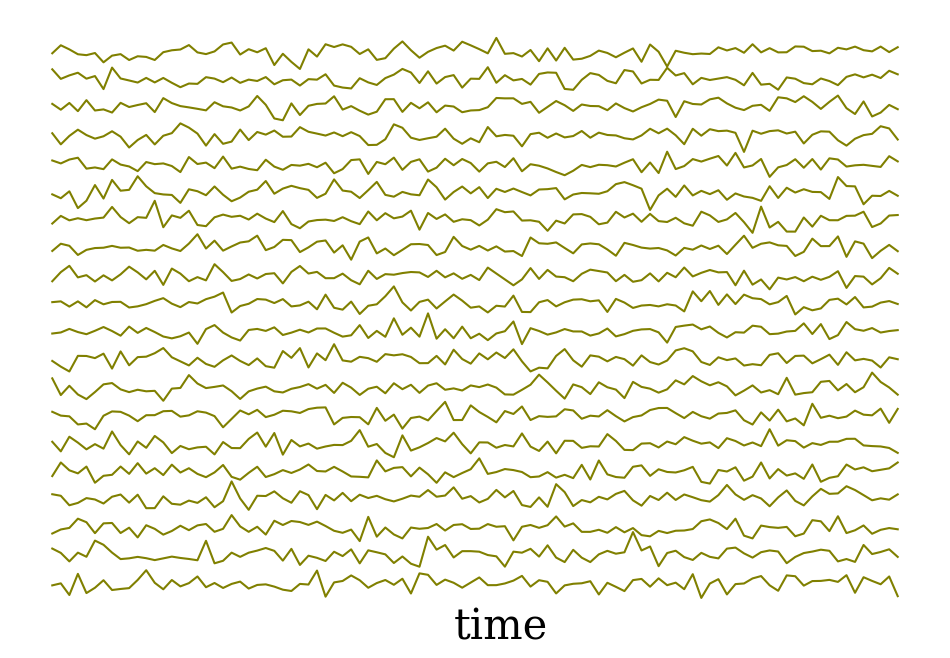

In [12]:
np.random.seed(2)
x = np.random.normal(0, 1, size = (20, 100))
x += 5*np.arange(x.shape[0])[:, np.newaxis]
plt.figure(figsize = (12, 8))
for i in range(x.shape[0]):
    plt.plot(x[i], color = 'olive')
plt.axis('off')
plt.text(x.shape[1]/2 - 3, -10, 'time', size = 30)
plt.savefig('figures/ts-illustration-brain.jpeg', dpi = 500, bbox_inches = 'tight')
plt.show()